# CS F415 - Data Mining 

## Section 1 - Data Preprocessing 

This notebook will contain basic information about the various data preprocessing techniques as mentioned in the lectures followed by code snippets in python that will help you realise these methods on a sample dataset. The Notebook will first contain brief information about the types of data and then cover the various preprocessing techniques. The preprocessing techniques that will be covered in this notebook are:
* Aggregation
* Sampling
* Dimensionality Reduction 
* Feature Subset Selection
* Feature Creation Discretization and Binarization
* Attribute Transformation

### Step 1: Python and Jupyter Environment Setup

This section is for people who have never worked with Jupyter or used Python for Data Science Related Applications. In case you already have the environment setup, feel free to skip to this [section](#cell2)

Check out: [What are Jupyter Notebooks/IPython Notebooks?](https://www.youtube.com/watch?v=jZ952vChhuI)

In order to run these notebooks on your device or to create notebooks such as these for hands on experience, there are several approaches:

#### Approach 1. Google Colab 

Advantages: 
* Google Colab allows you to remotely access a computer on the cloud which already has the environment setup and the most popular Machine Learning (ML), Deep Learning (DL) and Natural Language Processing (NLP) Libraries installed which allows a user with any hardware to perform computationally-intensive ML and DL tasks even with weak hardware
* This means you can directly start getting some hands on experience with these notebooks.
* For Beginners with little experience in setting up environments, Google Colab is the best way to start. 
* You have access to more powerful Server-Class Graphics Processing Units (GPUs) as compared to the ones available to general consumers which as Desktop-Class GPUs which are sometimes required for more powerful Machine Learning and Deep Learning Tasks

Disadvantages: 
* The Cloud environment means that the resources that google can provide for free are limited and thus, upon some idle time away from the notebook your session would be reset including the storage and any files you may have saved in that session. 
* The GPUs that are available are often available for limited periods of time and are easy to exhaust. If exhausted, one may need to purchase additional GPU credits.

[Link to Google Colab]('https://colab.research.google.com/')

---

#### Approach 2. The next method is to use Anaconda Navigator and a Local Jupyter Server. 

This method requires a bit of initial setup and this varies based on the Operating System of the user and this method is hardware dependent.

Advantages:
* The server is always running as long as you decide to kill it which means that all the local variables and the files you require for input and any output files generated will always be safely stored on your local storage.
* Running locally means that your data remains private and lets you access the notebook when offline

Disadvantages:
* The initial setup with anaconda could be error prone and tricky if the user already has python installed on their system. 
* Forgetting to kill the server before quitting the jupyter environment may result in some issues. 
* The hardware a user can use is limited to the hardware that a user can access

[Setup Tutorial for Windows](https://www.xda-developers.com/how-install-jupyter-notebook-windows/)

[Setup Tutorial for MacOS](https://www.youtube.com/watch?v=A_xY5eL_IKU)

[Setup Tutorial for Linux(Debian Based Distros - Ubuntu)](https://www.youtube.com/watch?v=wotkLCoJ_ks)

---

#### Approach 3. Installing Python and Setting up Jupyter Environment on Visual Studio Code

Advantages:
* Similar to Jupyter Server, it runs locally so it contains the same advantages
* Since it runs on a fully fledged IDE like Visual Studio Code, One can customize the interface to fit their convenience and install additional extensions which could help the experience. 
* Server is always killed when you close Visual Studio Code
* Similar Setup for all operating systems once you get Python Setup and install Visual Studio Code

Disadvantages:
* Restriced to user hardware
* Initial Setup can be a bit tedious

Setup Tutorial for Python: 
* [Windows]('https://docs.python.org/3/using/windows.html')
* [MacOS]('https://docs.python.org/3/using/mac.html')
* [Linux (Ubuntu)]('https://phoenixnap.com/kb/how-to-install-python-3-ubuntu')

[Setup Tutorial for Visual Studio Code]('https://code.visualstudio.com/learn/get-started/basics')

[Setup Tutorial for Jupyter on Visual Studio Code]('https://code.visualstudio.com/docs/datascience/jupyter-notebooks')

---

Once the environment is setup, you may be required to install some python libraries that are needed to run this notebook. At any point in the notebook, if you receive an error such as: 

 `import 'numpy' is not resolved`

Use the pip library to install the library. In case you are running on colab, most of the libraries would already be installed but in case there is a library that isnt on the colab environment use:

`!pip install numpy`

After installing the Libraries the rest of the cells in this notebook can be run without any issues. 

--- 

For the rest of this notebook we will be using popular data science libraries, the links for the documentation would be provided through which any doubt regarding the syntax can be clarified but in case of more doubts please look it up on the internet until you understand what the cell is achieving.

Also check out: 
* [Intro to Numpy](https://www.youtube.com/watch?v=xECXZ3tyONo)

* [Intro to Pandas and Matplotlib](https://www.youtube.com/watch?v=a9UrKTVEeZA)

---



<a id='cell2'></a>

### Step 2: Importing a Dataset, Some Useful Functions and Dealing with Missing Data

#### Importing the Libraries and a CSV File Dataset into a Pandas DataFrame

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

* Throughout the rest of this notebook we will be adding certain libraries as we require them. 
* The datasets used for different parts of the notebook may also vary so ensure that you have all the datasets downloaded.

For the example here, we are using a dataset that contains Indian Rainfall Data through which we will cover some basic explorations you can

`pd.read_csv()`

This Function allows us to import the comma seperated value file as a Pandas DataFrame.

In [3]:
df = pd.read_csv('./Datasets/Data_Preprocessing/rainfall.csv')

#### Some Useful Functions that can be used on DataFrames

`DataFrame.head()`

This Function shows the first 5 entries of the DataFrame.

In [4]:
df.head()

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


`DataFrame.info()`

This Function lets us view some information about the DataFrame Columns and their Datatypes.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        4116 non-null   int64  
 1   SUBDIVISION  4116 non-null   object 
 2   YEAR         4116 non-null   int64  
 3   JAN          4112 non-null   float64
 4   FEB          4113 non-null   float64
 5   MAR          4110 non-null   float64
 6   APR          4112 non-null   float64
 7   MAY          4113 non-null   float64
 8   JUN          4111 non-null   float64
 9   JUL          4109 non-null   float64
 10  AUG          4112 non-null   float64
 11  SEP          4110 non-null   float64
 12  OCT          4109 non-null   float64
 13  NOV          4105 non-null   float64
 14  DEC          4106 non-null   float64
 15  ANNUAL       4090 non-null   float64
 16  Jan-Feb      4110 non-null   float64
 17  Mar-May      4107 non-null   float64
 18  Jun-Sep      4106 non-null   float64
 19  Oct-De

`DataFrame.describe()`

This Function displays the statistics about the DataFrame's columns.

In [6]:
df.describe()

,index,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,2057.500000,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,1188.331183,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,0.000000,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1028.750000,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,2057.500000,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,3086.250000,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,4115.000000,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


#### Dealing with Missing Data

##### Approach 1: Dropping the Rows that contain the missing data

`DataFrame.isnull().sum()`

This snippet shows how one can count the number of Null values in a dataset by Column name.

In [7]:
df.isnull().sum()

index           0
SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

`DataFrame.dropna()` and  `DataFrame.drop_duplicates()`

The first function allows us to drop the null values and the second allows us to drop duplicates

In [8]:
df = df.dropna()
df = df.drop_duplicates()
df.isnull().sum()

index          0
SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

##### Approach 2: Imputing the Data with Statistical Data such as Mean, Median or Mode

In [9]:
df = pd.read_csv('./Datasets/Data_Preprocessing/rainfall.csv')

In [10]:
df.isnull().sum()

index           0
SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

`DataFrame.fillna()`

In [11]:
df['ANNUAL'] = df['ANNUAL'].fillna(df['ANNUAL'].median())

# Similarly the null values can be filled with the mean

# df = df['ANNUAL'].fillna(df['ANNUAL'].mean())
df.isnull().sum()

index           0
SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL          0
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

---

### Step 3: Data Preprocessing - Intro

The next few sections will contain code snippets of how to implement the data preprocessing methods discussed in the class. The following sections may contain some lines where the objective of the lines are unclear, please refer to the official documentations for the library to understand them better.

* [Numpy Documentation]('https://numpy.org/doc/')

* [Pandas Documentation]('https://pandas.pydata.org/docs/')

* [Matplotlib Documentation]('https://matplotlib.org/stable/index.html')

* [Scikitlearn Documentation]('https://scikit-learn.org/0.21/documentation.html')

### Step 3.1: Data Preprocessing - Aggregation

*Data aggregation is the process of compiling typically (large) amounts of information from a given database and organizing it into a more consumable and comprehensive medium. Data aggregation can be applied at any scale, from pivot tables to data lakes, in order to summarize information and make conclusions based on data-rich findings. Because of the growing accessibility to information and importance of personalization metrics across the enterprise, the application of data aggregation has become extremely relevant.*

* Combining two or more attributes (or objects) into a single attribute (or object)
* Purpose
    * Data reduction
        * Reduce the number of attributes or objects
    * Change of scale
        * Cities aggregated into regions, states, countries, etc
    * More “stable” data
        * Aggregated data tends to have less variability 

Also see:

* [What is Data Aggregation?]('https://www.pagerduty.com/resources/learn/what-is-data-aggregation/')

* [Methods of Data Aggregation]('https://towardsdatascience.com/3-methods-for-aggregating-data-with-python-pandas-14ceb75b6f6e')


In [12]:
df_aggregation = pd.read_csv('./Datasets/Data_Preprocessing/US_CPI_Yearly.csv')
df_aggregation.head()

,Year,Month,CPI
0,1913,1,9.8
1,1913,2,9.8
2,1913,3,9.8
3,1913,4,9.8
4,1913,5,9.7


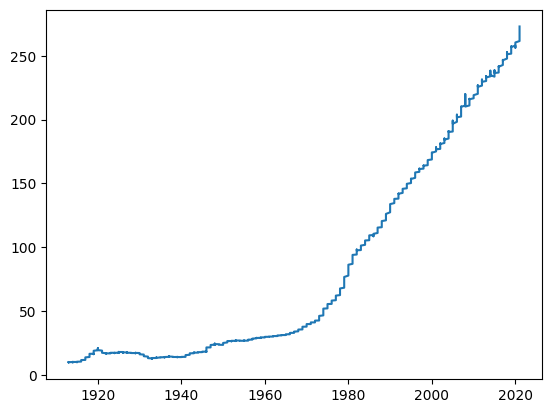

In [13]:
plt.plot(df_aggregation['Year'],df_aggregation['CPI'])
plt.show()

We can group the data above by the year and take the average CPI of the entire year

In [14]:
df_aggregation_grouped = df_aggregation.groupby(['Year']).mean()[['CPI']]
df_aggregation_grouped

,CPI
Year,
1913,9.883333
1914,10.016667
1915,10.108333
1916,10.883333
1917,12.825000
...,...
2017,245.119583
2018,251.106833
2019,255.657417


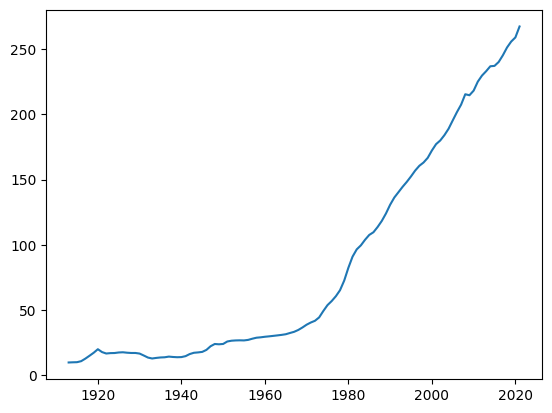

In [15]:
plt.plot(df_aggregation_grouped.index,df_aggregation_grouped['CPI'])
plt.show()

### Step 3.2: Data Preprocessing - Sampling

*Data sampling is a statistical analysis technique used to select, manipulate and analyze a representative subset of data points to identify patterns and trends in the larger data set being examined. It enables data scientists, predictive modelers and other data analysts to work with a small, manageable amount of data about a statistical population to build and run analytical models more quickly, while still producing accurate findings.*

* The key principle for effective sampling is: **A sample will work almost as well as using the entire data set if the sample is representative(different for different data set).**
* Sampling may remove outliers and if done improperly can introduce noise.

##### Types of Sampling:
* Simple Random Sampling
    * There is an equal probability of selecting any particular item
* Sampling without replacement
    * As each item is selected, it is removed from the population
* Sampling with replacement
    * Objects are not removed from the population as they are selected for the sample.   
        * In sampling with replacement, the same object can be picked up more than once
* Stratified sampling
    * Split the data into several partitions; then draw random samples from each partition



In [16]:
df_sampling = pd.read_csv('./Datasets/Data_Preprocessing/rainfall.csv')
df_sampling.head()

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


##### Simple Random Sampling without Replacement

`DataFrame.sample()`

In [17]:
random_sampled_df = df_sampling.sample(36) # Sampling 10 random items
random_sampled_df.head()

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
425,425,NAGA MANI MIZO TRIPURA,2004,4.8,2.7,11.0,341.5,211.0,449.2,558.6,284.3,351.0,132.7,6.4,0.5,2353.7,7.4,563.5,1643.2,139.6
2074,2074,WEST MADHYA PRADESH,1928,0.4,31.9,2.8,0.0,2.5,75.6,395.0,217.6,49.5,66.9,1.6,51.9,895.6,32.3,5.3,737.7,120.3
3658,3658,NORTH INTERIOR KARNATAKA,1902,0.0,0.0,0.3,22.5,34.4,111.3,83.2,78.1,146.7,118.8,35.7,85.1,716.1,0.0,57.1,419.3,239.6
3567,3567,COASTAL KARNATAKA,1926,12.3,2.0,0.1,7.3,15.3,686.3,976.4,850.3,258.7,143.6,4.0,0.1,2956.4,14.3,22.6,2771.7,147.7
3774,3774,SOUTH INTERIOR KARNATAKA,1903,0.3,0.0,1.1,11.6,125.1,129.7,284.4,155.7,197.1,154.2,186.6,24.1,1269.9,0.3,137.7,766.9,364.9


##### Simple Random Sampling with Replacement

`DataFrame.sample(replace=True)`

In [18]:
random_sampled_replacement_df = df_sampling.sample(36,replace=True) # Sampling 10 random items
random_sampled_replacement_df.head()

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
873,873,JHARKHAND,1992,2.3,6.1,0.6,8.8,51.8,129.8,295.7,265.2,148.5,22.5,1.6,0.3,933.0,8.3,61.2,839.2,24.3
1508,1508,PUNJAB,1937,5.8,96.0,10.2,41.8,8.8,55.4,218.6,30.5,70.2,7.3,0.3,26.2,571.1,101.8,60.8,374.7,33.8
3490,3490,TAMIL NADU,1964,1.6,1.2,15.5,11.4,56.8,31.3,174.7,100.8,92.3,187.7,166.4,70.9,910.6,2.7,83.8,399.1,424.9
19,19,ANDAMAN & NICOBAR ISLANDS,1921,13.2,3.1,0.0,37.5,351.2,282.7,487.1,330.0,581.2,360.7,118.2,41.5,2606.4,16.3,388.7,1681.0,520.4
1494,1494,PUNJAB,1923,36.4,63.0,7.3,4.9,38.0,21.8,222.2,279.1,12.8,5.7,2.5,44.1,737.9,99.4,50.2,536.0,52.3


##### Stratified Sampling

In [19]:
df_stratified_sampling = pd.read_csv('./Datasets/Data_Preprocessing/rainfall.csv')
df_stratified_sampling = df_stratified_sampling.drop('index',axis=1)
stratified_sampled_df = df_stratified_sampling.groupby('SUBDIVISION',group_keys=False).apply(lambda x: x.sample(frac=0.01))
stratified_sampled_df.head()

/tmp/ipykernel_20425/1616637742.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sampled_df = df_stratified_sampling.groupby('SUBDIVISION',group_keys=False).apply(lambda x: x.sample(frac=0.01))


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
124,ARUNACHAL PRADESH,1930,64.4,84.3,202.5,565.4,148.9,720.9,376.2,1055.5,637.0,361.1,93.2,24.9,4334.1,148.7,916.8,2789.5,479.1
252,ASSAM & MEGHALAYA,1946,0.4,19.4,102.6,178.5,328.0,582.6,547.0,297.9,266.8,346.3,8.6,1.4,2679.5,19.8,609.2,1694.2,356.4
951,BIHAR,1955,20.0,6.7,2.3,11.9,28.2,172.5,505.7,268.7,192.2,35.7,0.3,0.1,1244.2,26.7,42.5,1139.0,36.1
3069,CHHATTISGARH,2003,3.7,17.7,12.1,2.6,0.7,128.7,446.6,519.7,384.1,157.6,5.8,14.9,1694.3,21.4,15.5,1479.1,178.2


In [20]:
print(f"The total number of Unique Subdivisions in the Dataset: {len(df_stratified_sampling['SUBDIVISION'].unique())}")

The total number of Unique Subdivisions in the Dataset: 36


In [21]:
print(f"Total Number of Items Sampled: {stratified_sampled_df['SUBDIVISION'].value_counts().sum()}")

Total Number of Items Sampled: 36


Uncomment this to verify that there is infact 1 sample from every subdivision

In [22]:
# stratified_sampled_df['SUBDIVISION'].value_counts()

We can see that the data is sampled equally from each of the states as compared to the previous random samples as compared to the randomly sampled instances above. This is the advantage that stratified sampling provides.

Also see:
* [More Sampling Methods and their Implementations]('https://medium.com/lunartechai/data-sampling-methods-in-python-a4400628ea1b')
* [Stratified Sampling v/s Random Sampling]('https://www.investopedia.com/ask/answers/042415/what-difference-between-simple-random-sample-and-stratified-random-sample.asp')


### Step 3.3 Data Preprocessing - Dimensionality Reduction

##### **Dimensionality Reduction using Principal Component Analysis**

*Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension.Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set*

---

##### **Working of PCA**:

**1. Mean Center the Data**
    
The mean of the data can be computed by using the formula:
$$ \bar{x} = \frac{\sum_{n=1}^N x_n}{N} $$

Then to Mean Center the data simply replace every data point $x_i$ as follows: $$x_i = x_i - \bar{x}$$ 

When the data is Mean Centered, the new mean of the data $\bar{x}_{new}$ becomes: 
$$ \bar{x}_{new} = 0 $$

**2. Compute the Covariance Matrix**

The covariance between x and y can be computed using the formula:
$$ cov(x,y) = \frac{\sum_{i=1^n}(x_i - \bar{x})(y_i - \bar{y})}{n-1} $$

**3. Compute the Eigen Value Decomposition of the Covariance Matrix**

Let $X$ be a matrix such that:
$$
X =
\begin{pmatrix}
  x_{n1}   \\
  x_{n2}  \\
  \vdots  \\
  x_{nD}   \\
\end{pmatrix}
$$

Let $\bar{X}$ be a matrix such that:
$$
\bar{X} = 
\begin{pmatrix}
  \bar{x}_1 & \bar{x}_2 & \dots & \bar{x}_n   \\
\end{pmatrix}
$$

The Covariance Matrix $S$ is given by:

$$ S = \frac{\sum_{n=1}^N (X_n - \bar{X}) (X_n - \bar{X})^T}{N} $$

Once this matrix $S$ is derived, compute its Eigenvalues

**4. Find the Best $k$ Eigen Vectors by using Eigen Values**

The dimensions of your dataset are now reduced to $k$ dimensions instead of $N$

---

In [23]:
pca_df = pd.read_csv('./Datasets/Data_Preprocessing/Wine.csv')
pca_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [24]:
print(f"The Number of Dimensions in the Dataset: {len(pca_df.columns[:-1])}")

The Number of Dimensions in the Dataset: 13


In [25]:
X = pca_df.iloc[:, 0:13].values
y = pca_df.iloc[:, 13].values
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [26]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 3)
 
X_train = pca.fit_transform(X)
X_test = pca.transform(X)
 
explained_variance = pca.explained_variance_ratio_

In [27]:
print(f"The top 3 Variance Ratios are: {explained_variance}") 

The top 3 Variance Ratios are: [9.98091230e-01 1.73591562e-03 9.49589576e-05]


In [28]:
print(f"The Top 3 Eigenvectors are: {pca.components_}")

The Top 3 Eigenvectors are: [[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
   1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
   6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
   9.99822937e-01]
 [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
   9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
   5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
  -1.77738095e-02]
 [-1.68738094e-02 -1.22003373e-01 -5.19874304e-02 -9.38593003e-01
   2.97802484e-02  4.04846439e-02  8.54433387e-02 -1.35107797e-02
   2.46593824e-02 -2.91398464e-01  2.59776624e-02  7.03239693e-02
  -4.52868159e-03]]


---

##### **Dimensionality Reduction using Linear Discriminant Analysis (LDA)**

*LDA works by projecting the data onto a lower-dimensional space that maximizes the separation between the classes. It does this by finding a set of linear discriminants that maximize the ratio of between-class variance to within-class variance. In other words, it finds the directions in the feature space that best separate the different classes of data.*

##### **Equations of LDA:**

**1. LDA Equation for 2-Class Dataset**

$$
S_W^{-1}S_BU = \lambda U$$
where $\lambda$ is the eigenvalue of the the matrix $S_W^{-1}S_B$:
$$
\lambda = \frac{{U^T}_{1\times d}{S_B}_{d\times d}U_{d\times1}}{{U^T}_{1\times d}{S_W}_{d\times d}U_{d\times1}}
$$

**2. LDA Equation for K-Class Dataset**

$$
S_W^{-1}S_BU = \lambda U$$
where $\lambda$ is the eigenvalue of the the matrix $S_W^{-1}S_B$:
$$
\lambda = \begin{pmatrix}
\lambda_1 \\
 & \lambda_2 &  \\
 & &  \ddots & \\
&&& \lambda_n \\
\end{pmatrix}
$$

In [52]:
from sklearn.datasets import load_iris

lda_data = load_iris(as_frame=True)
lda_features = lda_data.data.values
lda_labels = lda_data.target.values

In [53]:
lda_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [55]:

sc = StandardScaler()
lda_features = sc.fit_transform(lda_features)
le = LabelEncoder()
lda_labels = le.fit_transform(lda_labels)
lda_X_train, lda_X_test, lda_y_train, lda_y_test = train_test_split(lda_features, lda_labels, test_size=0.2)
 
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda_X_train_final = lda.fit_transform(lda_X_train, lda_y_train)
lda_X_test_final = lda.transform(lda_X_test)

**Let us check the scatter plot of the first 2 components and their respective classes before Linear Discriminant Analysis (LDA)**

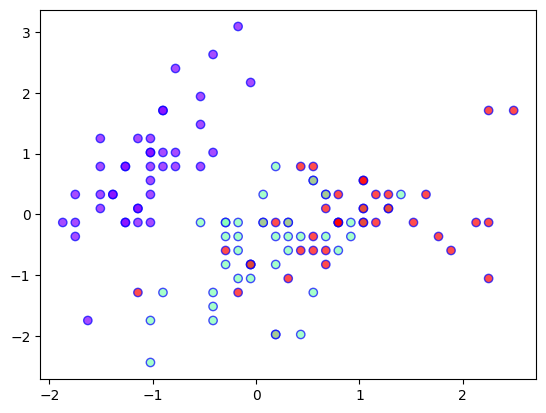

In [57]:
plt.scatter(
    lda_X_train[:,0],lda_X_train[:,1],c=lda_y_train,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)

**Now Lets see the scatterplot after using LDA to reduce the number of features to 2**

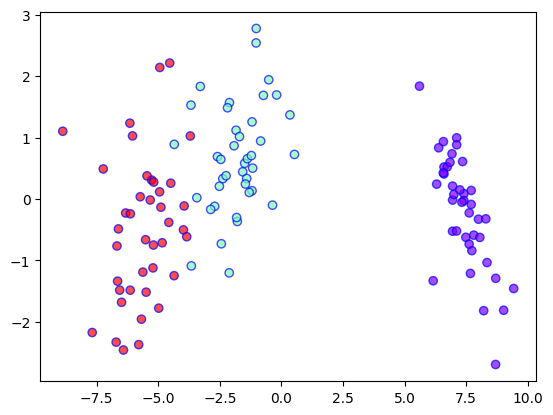

In [56]:
plt.scatter(
    lda_X_train_final[:,0],lda_X_train_final[:,1],c=lda_y_train,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)

Also refer:

[Dimensionality Reduction and Methods]('https://www.geeksforgeeks.org/dimensionality-reduction/')

---

### Step 3.4 Data Preprocessing - Feature Subset Selection

*What is Feature Selection? Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data. It is the process of automatically choosing relevant features for your machine learning model based on the type of problem you are trying to solve.*

**Methods of Feature Subset Selection**:

* Embedded Approaches 
    * Feature selection is done while training the model
* Filter Approaches - Unsupervised
    * Use only features/predictor variables
    * Select the features that have the most information
* Wrapper Approaches - Supervised
    * Train using the selected subset
    * Estimate error on the validation set 



In [28]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv(filepath_or_buffer='./Datasets/Data_Preprocessing/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston = boston.drop(columns='RAD')
boston.head()
X = boston.drop('MEDV',axis=1)
y = boston['MEDV']
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


#### Dropping Columns by Using Variance (Univariate Filter)

In [29]:
boston.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
MEDV          84.586724
dtype: float64

Now we drop the features with the least variance

In [30]:
X = X.drop(['NOX','CHAS'],axis=1)
X

,CRIM,ZN,INDUS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


#### Dropping features based on Correlation (Univariate Filters)

In [31]:
import seaborn as sns

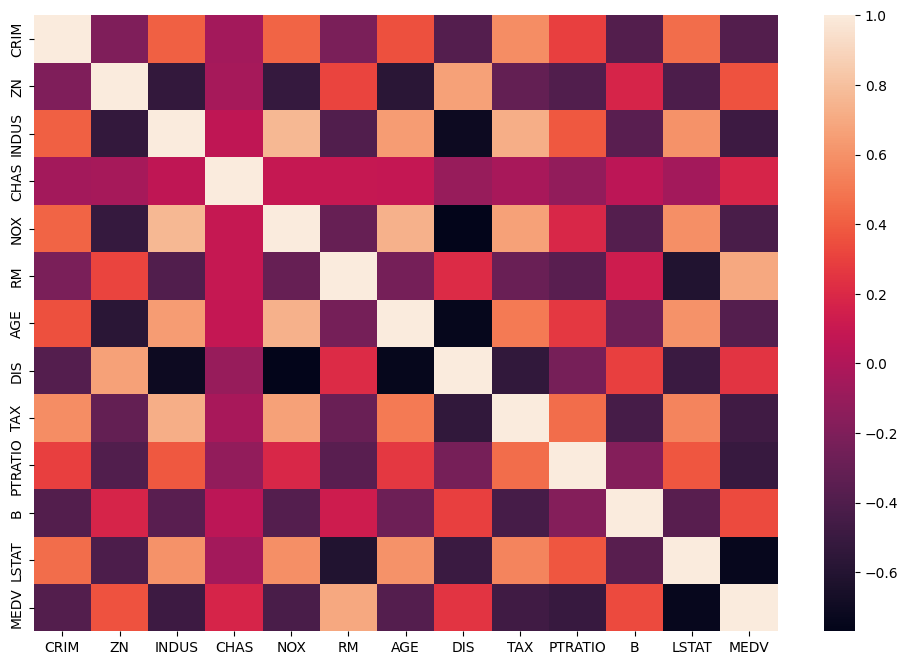

In [32]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(boston.corr(), ax=ax)
plt.show()

In [33]:
abs(boston.corr()["MEDV"])

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [34]:
print(f"The list of columns that are below the threshold of 0.3 are: {abs(boston.corr()['MEDV'][abs(boston.corr()['MEDV'])<0.3]).index.to_list()}")

The list of columns that are below the threshold of 0.3 are: ['CHAS', 'DIS']


---

#### Chi-Squared Test - Filter Feature Selection

The Chi-Squared Statistic ($X^2$) is given by:
$$ X^2 = \Sigma\frac{(O-E)^2}{E} $$

where $O$ is the contingency table and $E$ is:
$$ E = \frac{\Sigma_{row}*\Sigma_{col}}{N} $$

**If  $X^2$ >= $z_\alpha$, then reject $H_0$, else accept $H_0$. Similarly, if $X^2$ >= $z_\alpha$, then accept $H_A$, else reject $H_A$.**  

In [35]:
tips=sns.load_dataset('tips')

**Null Hypothesis($H_0$): Smoking Status is Independent of Gender**

**Alternate Hypothesis($H_A$): Smoking Status is Dependent on Gender**

**$\alpha = 0.5$**

In [36]:
contingency_table = pd.crosstab(tips['sex'],tips['smoker'])
contingency_table.values

array([[60, 97],
       [33, 54]])

In [37]:
from scipy.stats import chi2_contingency

In [38]:
_,_,_, expected_freq = chi2_contingency(contingency_table)
expected_freq

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [39]:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degrees of Freedom:",ddof)
alpha = 0.05

Degrees of Freedom: 1


In [40]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(contingency_table.values,expected_freq)])
chi_square_statistic=chi_square[0]+chi_square[1]
     

print("The Chi-Squared Statistic is:",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('The Critical Value is:',critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print(f"The p-value of the test is: {p_value}")

The Chi-Squared Statistic is: 0.001934818536627623
The Critical Value is: 3.841458820694124
The p-value of the test is: 0.964915107315732


Since Chi Square Statistic > Critical Value:
 
**Reject $H_0$, There is a dependence between the two variables**

---

#### Using Wrapper Selection (Sequential Feature Selection) for a Logistic Regression Model

*Sequential feature selection (SFS) is a greedy algorithm that iteratively adds or removes features from a dataset in order to improve the performance of a predictive model. SFS can be either forward selection or backward selection. Forward selection is a step-wise feature selection method that starts with an empty feature set and iteratively adds one feature at a time based on certain evaluation criteria.Backward selection is the opposite of forward-select where you start with a full feature set and keep eliminating features.*

In [30]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [42]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

In [43]:
logreg = LogisticRegression()
 
# Create a sequential feature selector
selector = SequentialFeatureSelector(
    logreg, n_features_to_select=2, scoring='accuracy')
 
# Fit the selector to the data
selector.fit(X, y)
 
# Get the selected features
selected_features = selector.get_support()
 
print('The selected features are:', list(X.columns[selected_features]))


The selected features are: ['petal length (cm)', 'petal width (cm)']


Also refer:

[Wrapper-Based Feature Selection]('https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/')

[Filter-Based Feature Selection]('https://medium.com/analytics-vidhya/feature-selection-73bc12a9b39e')

---

### Step 3.5 Data Preprocessing - Feature Creating Discretization and Binarization

#### Dealing with Continuous Data

##### **Discretization** 
*Data discretization refers to a method of converting a huge number of data values into smaller ones so that the evaluation and management of data become easy. In other words, data discretization is a method of converting attributes values of continuous data into a finite set of intervals with minimum data loss.*


In [44]:
discretization_df = pd.read_csv('./Datasets/Data_Preprocessing/discretization.csv',index_col='ID')
discretization_df.head()

,Age
ID,
1,19
2,70
3,36
4,13
5,42


In [45]:
print(f"The number of unique age values are: {len(discretization_df['Age'].unique())}")

The number of unique age values are: 21


In the above dataset, we can discretize the age into fewer values by adding some thresholds:
* If $age>=0$ and $age<13$, then the data can be categorized as **Child**
* If $age>=13$ and $age<20$, then the data can be categorized as **Teenager**
* If $age>=20$ and $age<60$, then the data can be categorized as **Adult**
* If $age>=60$ and $age<110$, then the data can be categorized as **Old**
* If $age>=110$ or $age<0$, the the data can be categorized as **Invalid**

In [46]:
col_values = ['Child','Teenager','Adult','Old','Invalid']
def get_category(age):
    if age>= 0 and age<13:
        return col_values[0]
    elif age>=13 and age<20:
        return col_values[1]
    elif age>=20 and age<60:
        return col_values[2]
    elif age>=60 and age<110:
        return col_values[3]
    elif age>=110 or age<0:
        return col_values[4]
discretization_df['Categorical'] = discretization_df['Age'].apply(get_category)
discretization_df = discretization_df.drop('Age',axis=1)
discretization_df.head()

,Categorical
ID,
1,Teenager
2,Old
3,Adult
4,Teenager
5,Adult


In [47]:
print(f"The number of unique age values are: {discretization_df['Categorical'].unique()}")

The number of unique age values are: ['Teenager' 'Old' 'Adult' 'Child']


---

#### Binarization

##### **Approach 1: Representing category in binary format**
The process of binarizing involves converting this newly formed categorical data into numbers that can be fed into statistical models. If the categorical column contains $m$ categories then we add $\log_2{m}$ columns to the data and represent the categories in binary number representation.

In [48]:
import math

In [49]:
for i in range(math.floor(math.log2(len(discretization_df['Categorical'].unique())))+1):
    
    discretization_df[f"x{i+1}"] = 0

discretization_df



,Categorical,x1,x2,x3
ID,,,,
1,Teenager,0,0,0
2,Old,0,0,0
3,Adult,0,0,0
4,Teenager,0,0,0
5,Adult,0,0,0
6,Teenager,0,0,0
7,Child,0,0,0
8,Adult,0,0,0
9,Old,0,0,0


In [50]:
discretization_df['Categorical'][1] =='Teenager'

True

In [51]:
%%capture --no-display
for i in range(1,discretization_df['Categorical'].count()+1):
    if discretization_df['Categorical'][i] == 'Teenager': 
        discretization_df['x1'][i] = 0
        discretization_df['x2'][i] = 0
        discretization_df['x3'][i] = 1
    elif discretization_df['Categorical'][i] == 'Adult': 
        discretization_df['x1'][i] = 0
        discretization_df['x2'][i] = 1
        discretization_df['x3'][i] = 0
    elif discretization_df['Categorical'][i] == 'Child': 
        discretization_df['x1'][i] = 0
        discretization_df['x2'][i] = 0
        discretization_df['x3'][i] = 0
    elif discretization_df['Categorical'][i] == 'Old': 
        discretization_df['x1'][i] = 0
        discretization_df['x2'][i] = 1
        discretization_df['x3'][i] = 1

discretization_df.head()

,Categorical,x1,x2,x3
ID,,,,
1,Teenager,0,0,1
2,Old,0,1,1
3,Adult,0,1,0
4,Teenager,0,0,1
5,Adult,0,1,0


**Approach 2: Representing categories as one-hot encoded values**

In this approach if there are $m$ categories, we add $m$ columns to the dataset and one-hot encode the categories. For Association related problems, this approach is required because association looks only for the precense of the attribute ($value=1$) in the table 

In [52]:
from sklearn.preprocessing import LabelBinarizer

In [53]:
lb = LabelBinarizer().fit(discretization_df['Categorical'])

In [54]:
binarized_df = pd.DataFrame(np.hstack([discretization_df.index.to_numpy().reshape(-1,1),lb.transform(discretization_df['Categorical'])]),columns=['ID','x1','x2','x3','x4'])
binarized_df = binarized_df.set_index('ID')
binarized_df = discretization_df.merge(binarized_df,'inner',left_index=True,right_index=True)
binarized_df.head()

,Categorical,x1_x,x2_x,x3_x,x1_y,x2_y,x3_y,x4
ID,,,,,,,,
1,Teenager,0,0,1,0,0,0,1
2,Old,0,1,1,0,0,1,0
3,Adult,0,1,0,1,0,0,0
4,Teenager,0,0,1,0,0,0,1
5,Adult,0,1,0,1,0,0,0


Also refer:

[Discretization in Data Mining]('https://www.javatpoint.com/discretization-in-data-mining')

[Binarization and Implementation in Python]('https://www.tutorialspoint.com/how-to-binarize-the-data-using-python-scikit-learn')

---

### Step 3.6 Data Preprocessing - Attribute Transformation

*Attribute transformation alters the data by replacing a selected attribute by one or more new attributes, functionally dependent on the original one, to facilitate further analysis*



    Note: In Data Mining, the terms Standardization and Normalization are used interchangeably. This is in contrast to ML Jargon where Standardization and Normalization are two different approaches.

#### Methods of Attribute Transformation

**Approach 1: Standardization or Normalization**

In this approach we scale the data using the formula:
$$ X_{new} = \frac{X-\bar{X}}{\sigma} $$

This approach is preferred when the features are of different scales

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaling_df = pd.read_csv('./Datasets/Data_Preprocessing/discretization.csv',index_col='ID')
standard_scaler = StandardScaler()
standard_scaler.fit(scaling_df)
scaled_data = standard_scaler.transform(scaling_df)
scaling_df['Age'] = pd.DataFrame(scaled_data,columns = ['Scaled'])['Scaled']
scaling_df.describe()

,Age
count,20.000000
mean,0.023809
std,1.045339
min,-1.196154
25%,-0.816165
50%,-0.256183
75%,0.543793
max,1.883751


As we can observe, the data above has been scaled to a normal distribution which is mean centered and has a standard distribution of 1.

**Approach 2: Min Max Normalization** 

In this approach, we transform the data using the formula:
$$ X_{new} = \frac{X-X_{min}}{X_{max}-X_{min}} $$

This approach can scale down any data into the ranges [-1,1] which makes it very useful for such cases

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaling_df = pd.read_csv('./Datasets/Data_Preprocessing/discretization.csv',index_col='ID')
minmax_scaler = MinMaxScaler()
scaled_data = minmax_scaler.fit_transform(scaling_df)
scaling_df['Age'] = pd.DataFrame(scaled_data,columns = ['Scaled'])['Scaled']
scaling_df.describe()

,Age
count,20.000000
mean,0.396104
std,0.339406
min,0.000000
25%,0.123377
50%,0.305195
75%,0.564935
max,1.000000


Also refer:

[Data Transformation in Data Mining]('https://www.geeksforgeeks.org/data-transformation-in-data-mining/')

---